In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Boston.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN


In [ ]:
df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'CAT. MEDV'], inplace = True)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

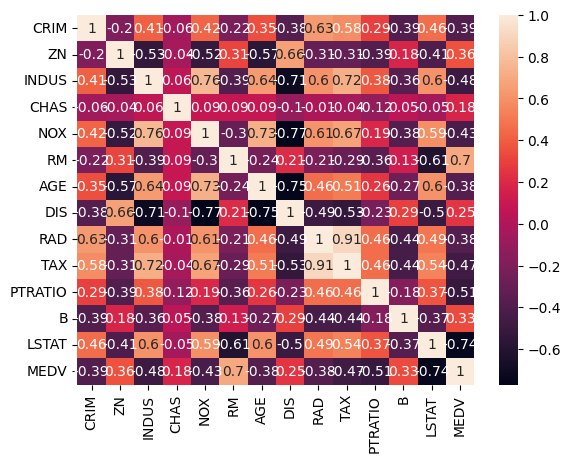

In [ ]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
X = df.iloc[:, :-1]
Y = df.loc[:,"MEDV"]

In [ ]:
X.shape, Y.shape

((506, 13), (506,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(256, input_shape=(13, ), activation='relu', name='dense_input'))
model.add(Dense(128, activation='relu', name='dense__layer_1'))
model.add(Dense(64, activation='relu', name='dense__layer_2'))
model.add(Dense(1, activation='relu', name='dense_output'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (Dense)         (None, 256)               3584      
                                                                 
 dense__layer_1 (Dense)      (None, 128)               32896     
                                                                 
 dense__layer_2 (Dense)      (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 44801 (175.00 KB)
Trainable params: 44801 (175.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=100,validation_split=0.05)

Epoch 1/100
12/12 [==============================] - 2s 37ms/step - loss: 361.9852 - mae: 16.9125 - val_loss: 228.5325 - val_mae: 11.4996
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 64.2633 - mae: 6.2201 - val_loss: 130.2740 - val_mae: 6.8859
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 29.3552 - mae: 4.0466 - val_loss: 116.6941 - val_mae: 6.4175
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 18.4047 - mae: 3.1337 - val_loss: 110.7368 - val_mae: 6.4603
Epoch 5/100
12/12 [==============================] - 0s 11ms/step - loss: 14.8800 - mae: 2.8078 - val_loss: 93.8362 - val_mae: 5.5934
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 13.8929 - mae: 2.6950 - val_loss: 71.4958 - val_mae: 4.9826
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 12.3347 - mae: 2.5741 - val_loss: 87.7942 - val_mae: 5.3478
Epoch 8/100
12/12 [==============================] - 0s 2

In [ ]:
mse, mae = model.evaluate(x_test, y_test)

print('Mean squared error on test data: ', mse)
print('Mean absolute error on test data: ', mae)

4/4 [==============================] - 0s 16ms/step - loss: 20.8153 - mae: 2.8899
Mean squared error on test data:  20.815277099609375
Mean absolute error on test data:  2.8898675441741943
